# First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 



*First Name:* Luis <br> 
*Last Name:* Garcia   
*E-mail:* garcial96ca@gmail.com

In [1]:
# imports
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Hard Way

In this part I'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

I parsed the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html)

Print the header, a row of the table, and the number of rows and columns.

In [3]:
# initialize the top-level array
movies = []

with open('movies.csv') as csvfile:
    # note that we can interchangably use ' and " in general
    # for the quotechar, however we use ' so that we can use " without escaping
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"') # dlimiters and quotechars takes care of quotes and 
    # the row here is an array
    for row in filereader:
        #print("Row: " + str(row))
        movies.append(row)

# Store the header in a separate array
header = movies.pop(0) # removes the top element of the list


In [4]:
for row in movies: 
    # need to try and catch the exception because the column contains NaN values
    try:
        row[5] = float(row[5])
        row[6] = float(row[6])
    except ValueError: # assigns those empty values to none so the code can continue running
        row[5] = None
        row[6] = None

### Task 1.2:  Calculate movie stats. Obtaining the following statistics using iteration loops


#### Task 1.2.1 Calcualte average ratings

#### Task 1.2.2: Calculate average rating for major movies

#### Task 1.2.3: Find the highest rated major movie

#### Task 1.2.4: Interpret the data


In [16]:
#row[6] = votes
#row[5] = ratings
#row[1] = name

highRat = []
avgRat = []
title = []
for rows in movies:
    highRat.append(rows[5])
    default = 400
    if rows[6]> default:
        avgRat.append(float(rows[5]))
        default = rows[6]
        high_title = str(rows[5]) +" " + rows[1]
        title.append(high_title)

sorted(title, reverse = True)
   
print("Average rating of all movies:", str(np.mean(highRat)))

print("Number of movies:", str(len(highRat)))

print("Average rating for major movies:", str(np.mean(avgRat)))

print("Number of major movies:", str(len(avgRat)))

print("Highest rated film: ", max(title))

Average rating of all movies: 5.932850241545893
Number of movies: 58788
Average rating for major movies: 6.345581586518701
Number of major movies: 7299
Highest rated film:  9.1 Shawshank Redemption, The


<b>Interpretation</b>: The size relationship between the major movies and all of the movies is that major movies only compromise of about 12.41%, which is quiet sizeable give then the number of years the dataset includes. Major movies are not always better than average movies. Depending on the attendance of the movie and the ratings the audience give, it may be major. It cannot be resolved just by simplying having 400 votes because what if that specific movie had about 5000 antendees but only recieved 420 votes? That wouldn't be any better than an average movie. 

## Part 2: Replicating Part 1 but with just Pandas

### Task 2.1: Loading data

In [6]:
# your code goes here
movies_= pd.read_csv("movies.csv")
movies_.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


**Interpretation**: With the default head.() function, 5 rows by 25 columns were loaded. All of the columns are 64 bit data types. No conversions are neeed for these columns.

### Task 2.2: Calculate the average rating


In [27]:
# your code goes here
print("Average rating: ", np.mean(movies_["rating"]))

Average rating:  5.932850241545932


### Task 2.4: Filter out Rows
To get better grasp of the major movies, I decided to reduce the dataset to the major movies


In [17]:
# your code goes here
major_movies = movies_[movies_['votes'] >400]
print(len(major_movies), "movies have more than 400 votes")

7299 movies have more than 400 votes


### Task 2.5: Calculate the average rating for major movies


In [18]:
# your code goes here
print("Average rating of major movies: ", np.mean(major_movies["rating"]))

Average rating of major movies:  6.345581586518689


### Task 2.6: Find the highest rated major movie


In [19]:
# sort dataframe by 'rating' and pull first row
title1 = major_movies[["rating", "title"]].sort_values(ascending= False, by = "rating").iloc[0] 


In [20]:
# your code goes here
print(title1)

rating                          9.1
title     Shawshank Redemption, The
Name: 46268, dtype: object


### Task 2.7: Filter out rows and count specific features

Obtained different movie genres
 * How many are comedies.
 * How many are dramas
 * How many are both, comedies and dramas
 

In [23]:
# your code goes here
comedy = major_movies[major_movies['Comedy']==1].count()['title']
drama = major_movies[major_movies['Drama']==1].count()['title']
both = major_movies[(major_movies['Comedy'] ==1) & (major_movies['Drama']==1)].count()['title']

In [24]:
print(comedy, "major movies are comedies")
print(drama, "major movies are drama")
print(both, "maajor movies are both drama and comedy")

2853 major movies are comedies
3771 major movies are drama
894 maajor movies are both drama and comedy


### Task 2.8: Compare ratings of different categories

Then I compared the movies of different categories by using the .describe() function that gives meaninful basic statistics about the dataset. Using the describe function requires 1 field to look at, normally a numeric field

In [25]:
# your code goes here

# Comedy
major_movies[major_movies['Comedy']==1]['rating'].describe()

count    2853.000000
mean        6.117525
std         1.191856
min         1.700000
25%         5.300000
50%         6.200000
75%         7.000000
max         8.900000
Name: rating, dtype: float64

In [26]:
#Drama
major_movies[major_movies['Drama']==1]['rating'].describe()


count    3771.000000
mean        6.732432
std         0.990911
min         1.300000
25%         6.100000
50%         6.900000
75%         7.400000
max         9.100000
Name: rating, dtype: float64

**Interpretation**: The average rating for drama is slightly higher than comedy by 0.62, while the minimum is higher for comedy by 0.4, and also the maximum value is 0.2 higher. The standard deviation is a bit higher in comedy, by 0.2, while the median for both differs by 0.7 as it is 6.2 in comedy while it is 6.9 in drama. 

### Task 2.9: Movies per year

I calculated how many major movies in the dataset that were made in each year
Calcluate how many major movies in this dataset were made in each year.

Then this dataset was used for a line chart

In [27]:
# your code

per_year = major_movies['year'].value_counts().sort_index()

In [28]:
print(per_year)

1902      1
1903      1
1915      1
1916      1
1917      1
       ... 
2001    336
2002    355
2003    313
2004    252
2005     39
Name: year, Length: 93, dtype: int64


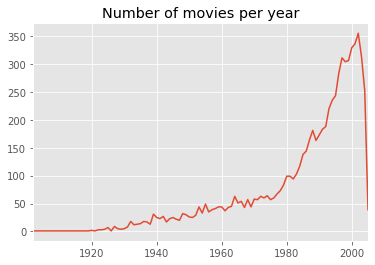

In [29]:
per_year.plot(title = "Number of movies per year" )

### Task 2.10: Yearly average


In [32]:
# your code goes here
plots_averag = major_movies.groupby(['year']).mean()['rating']

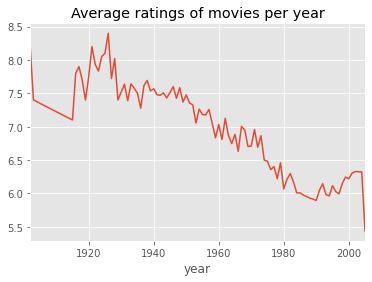

In [33]:
#Plot
plots_averag.plot(title = "Average ratings of movies per year")


### Task 2.11: Explore and Interpret

Here I try to make sense of if older movies were better?.

Are there differences between the rating of major movies and all movies over time? 


**Interpretation**: Based on the data we have plotted, it still cannot be conclusive that older movies are better than average films, due to the fact that movies were substantially prevelant within the last 2 decades of the day, which could then possibly increase the risk of producing poorly rated films since there is so much push to produce films.

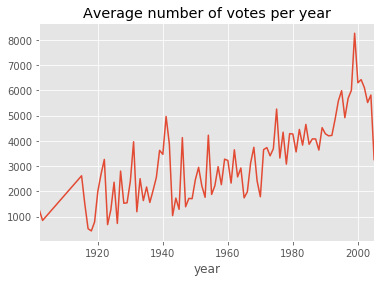

In [390]:
voting = major_movies.groupby(['year']).mean()['votes']

voting.plot(title = "Average number of votes per year")

<b> Interpretation: </b> As suspected from the previous interpretation, the average vote average per year increased overall, which can potentially bring about rating movies poorly.

In [399]:
length = major_movies.groupby(['year']).mean()['length']

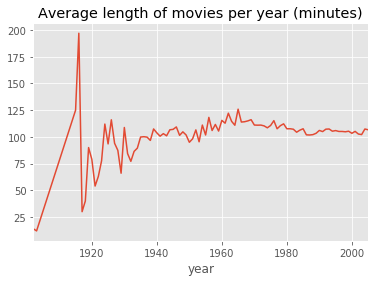

In [406]:
length.plot(title = "Average length of movies per year (minutes)")

<b> Interpretation: </b> Average length of movies over time would be an interesting dynamic to include as for a reason why ratings have gone down. Maybe the demographics would have preferred lengthy films because those films potentially dont leave the audience wondering.